## **Project Background**: **Loan Forecasting Automation**
Automate the loan eligibility process based on customer details provided during the completion of the online application form)

> Data collection : 

We have a few loan-related variables:
 - Like **Loan_ID**, which is the unique identifier of each client.
 - **LoanAmount** and **LoanAmountTerm**, which tell us the loan amount in thousands and the loan duration in months, respectively. 
 - **Credit History** indicates whether a client has unclear previous debts or not. 

- Apart from this, we also have details about the clients, such as their **Gender**, **Married**, **Education**, **ApplicantIncome**, etc. 

Using these features, we will create a predictive model that predicts the target variable which is the loan status representing whether the loan will be approved or not.

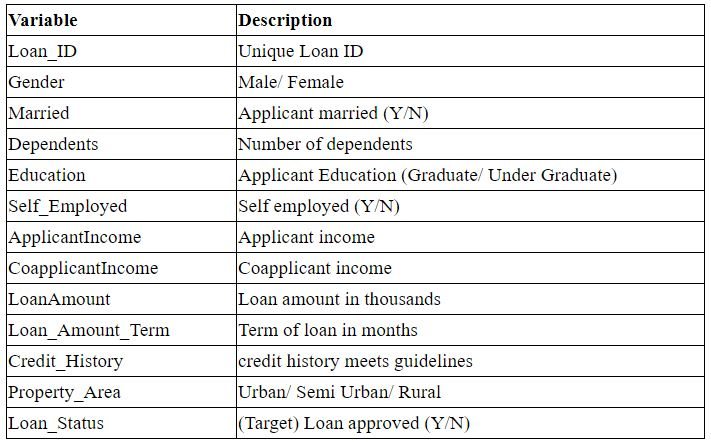

> Import librairies

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mno
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

%matplotlib inline
import seaborn as sns
sns.set() 
plt.rcParams["figure.figsize"] = (20,10)
# Setup display options of the notebook
pd.set_option('display.max_column', 111)
pd.set_option('display.max_colwidth', 100)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
os.chdir("/content/drive/MyDrive/ML_model_deployment_streamlit")

## loading Data

In [ ]:
df_train = pd.read_csv('./train_ctrUa4K.csv') 
df_test =  pd.read_csv('./test_lAUu6dG.csv')

In [ ]:
df_train.shape

(614, 13)

In [ ]:
df_test.shape

(367, 12)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
df_train.describe(include ="O")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002938,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


We see that the majority of people who are given **loans** are mostly **men** ,**married**, **educated**, **employed** and living in **semi-urban**.

In [ ]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Univariant Analysis :

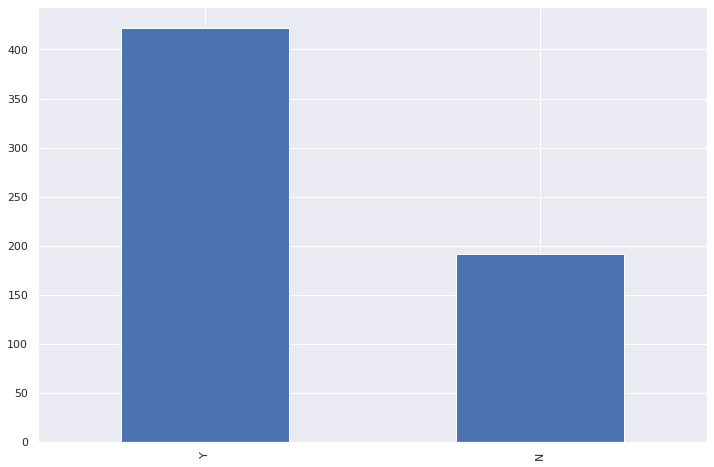

In [ ]:
df_train['Loan_Status'].value_counts().plot.bar(figsize=(12,8))

 > **Plots for Independent Categorical Variables**:

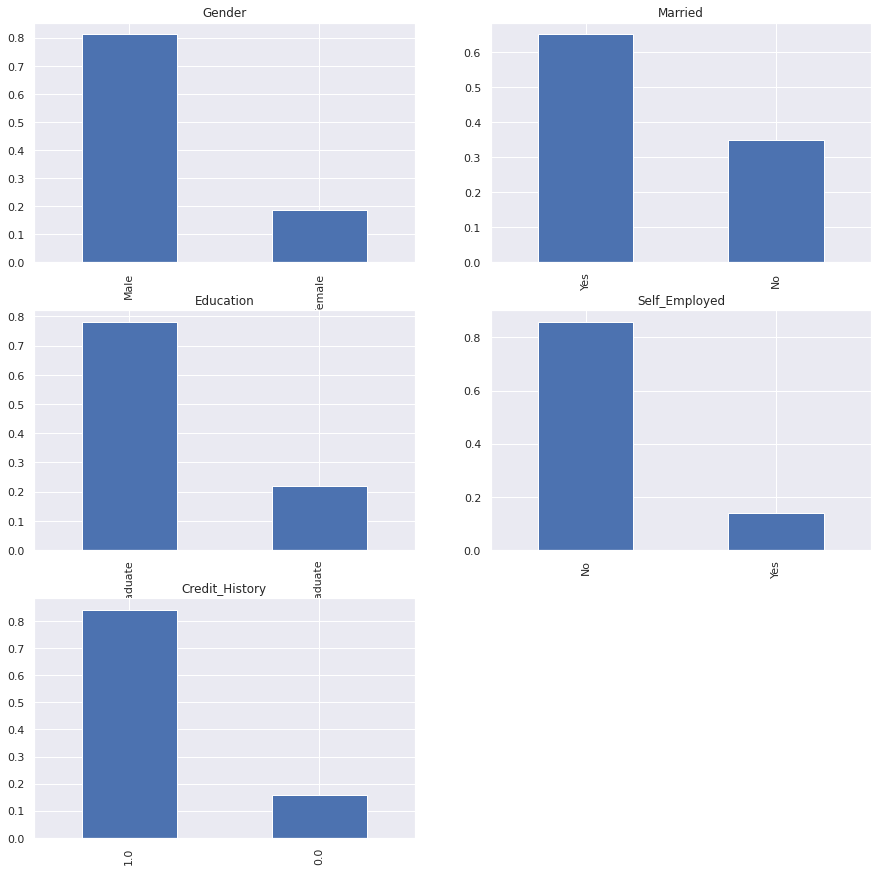

In [ ]:
plt.figure()
plt.subplot(321)
df_train['Gender'].value_counts(normalize=True).plot.bar(figsize=(15,15),title = 'Gender')

plt.subplot(322)
df_train['Married'].value_counts(normalize=True).plot.bar(figsize=(15,15),title = 'Married')

plt.subplot(323)
df_train['Education'].value_counts(normalize=True).plot.bar(figsize=(15,15),title = 'Education')

plt.subplot(324)
df_train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(15,15),title = 'Self_Employed')

plt.subplot(325)
df_train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(15,15),title = 'Credit_History')

It can be inferred from the above bar plots that:
 - **80%** applicant in the dataset are **male**.
 - Around **65%** of the applicant in the dataset are **married**.
 - Around **77%** of the applicant in the dataset are **graduates.
 - Around **15%** of the applicant in the dataset are **self_employed**.
 - Around **85%** of the applicant in the dataset have repaid their debts.

> **Plots for Independent Ordinal Variables**:

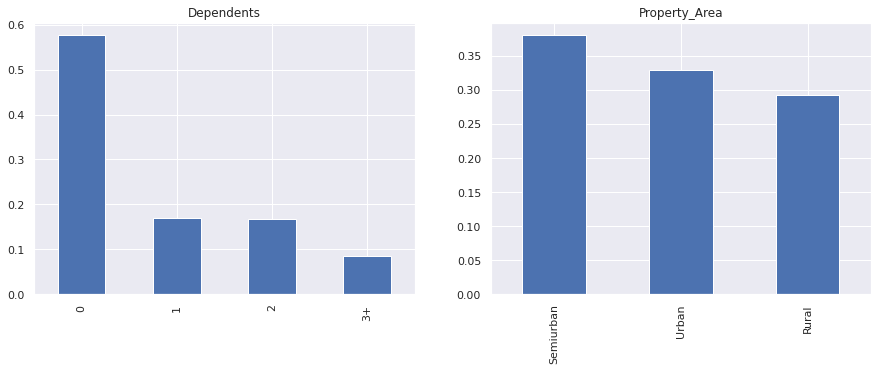

In [ ]:
plt.figure()
plt.subplot(121)
df_train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(15,5),title = 'Dependents')

plt.subplot(122)
df_train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(15,5),title = 'Property_Area')


It can made from the above bar plots:
 - Most of the applicant in the dataset do not have any dependents.
 - Most of the applicant in the dataset are from semiurban area.

> **Plots for Independent Numerical Variables**:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


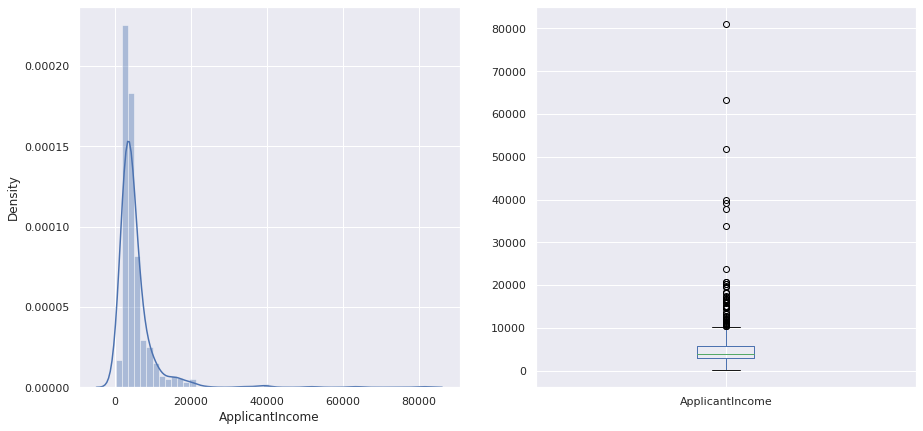

In [ ]:
plt.figure()
plt.subplot(121)
sns.distplot(df_train['ApplicantIncome'])

plt.subplot(122)
df_train['ApplicantIncome'].plot.box(figsize=(15,7))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

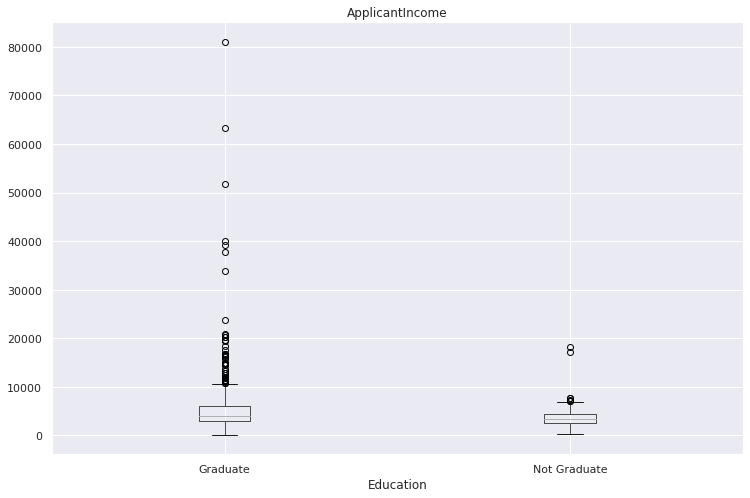

In [ ]:
df_train.boxplot(column="ApplicantIncome",by="Education",figsize=(12,8))
plt.suptitle('')

It can be inferred that most of the dataset in the distribution of applicant income is towards left which is not normally distributed, and the boxplot confirms the presence of a lot of extreme values/outliers. This can be attributed to income disparity in the society.

### Bivariant Analysis:

- Gender and loan status

In [ ]:
Gender = pd.crosstab(df_train['Gender'],df_train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


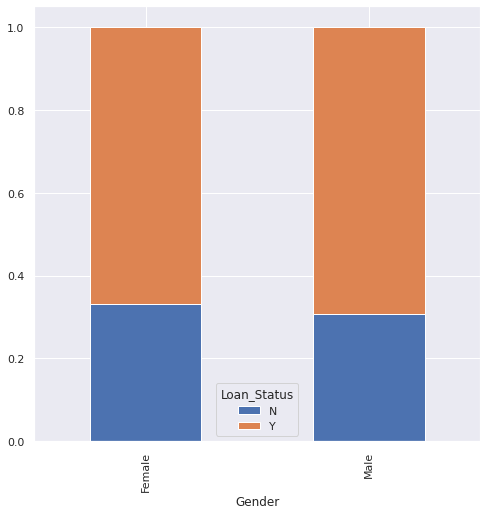

In [ ]:
Gender.div(Gender.sum(1).astype('float'),axis=0).plot(kind='bar',stacked=True,figsize=(8,8))

- Married and loan status

In [ ]:
Married = pd.crosstab(df_train['Married'],df_train['Loan_Status'])
Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


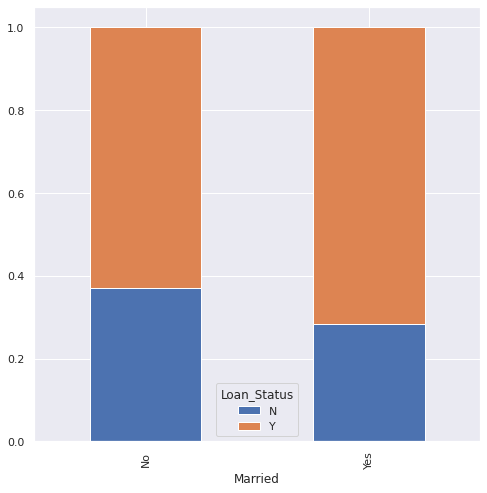

In [ ]:
Married.div(Married.sum(1).astype('float'),axis=0).plot(kind='bar',stacked=True,figsize=(8,8))

##  Data Preparation

In [ ]:
for i in (df_train.columns):
    # count number of rows with missing values
    n_miss = df_train[i].isnull().sum()
    perc = n_miss / df_train.shape[0] * 100
    
    print('> {}, Missing: {}  total {} %' .format (i, n_miss, perc))

> Loan_ID, Missing: 0  total 0.0 %
> Gender, Missing: 13  total 2.1172638436482085 %
> Married, Missing: 3  total 0.4885993485342019 %
> Dependents, Missing: 15  total 2.44299674267101 %
> Education, Missing: 0  total 0.0 %
> Self_Employed, Missing: 32  total 5.211726384364821 %
> ApplicantIncome, Missing: 0  total 0.0 %
> CoapplicantIncome, Missing: 0  total 0.0 %
> LoanAmount, Missing: 22  total 3.5830618892508146 %
> Loan_Amount_Term, Missing: 14  total 2.2801302931596092 %
> Credit_History, Missing: 50  total 8.143322475570033 %
> Property_Area, Missing: 0  total 0.0 %
> Loan_Status, Missing: 0  total 0.0 %


> 
  - Resolve Missing Values

In [ ]:
missing_values_count = df_train.isnull().sum()
total_cells = np.product(df_train.shape)
total_missing = missing_values_count.sum()

print('The number of missing values of all rows in the train dataset',(total_missing/total_cells)*100)

The number of missing values of all rows in the train dataset 1.8667000751691305


 - Since only 2% of the combined data are missing, I adopt the following method to replace them by  :
    - for numerical variables, I replace the missing value for the median.
    - for categorical variables, I replace the missing value for the most frequent mode.


> **Fixing Missing Values**:

In [ ]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace = True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace = True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace = True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace = True)
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace = True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace = True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace = True)

In [ ]:
df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace = True)
df_test['Married'].fillna(df_test['Married'].mode()[0], inplace = True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace = True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0], inplace = True)
df_test['LoanAmount'].fillna(df_test['LoanAmount'].median(), inplace = True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mode()[0], inplace = True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0], inplace = True)

In [ ]:
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,135.980926,342.822888,0.839237
std,4910.685399,2334.232099,60.959739,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
df_train['Gender']= df_train['Gender'].map({'Male':1, 'Female':0})
df_train['Married']= df_train['Married'].map({'Yes':1, 'No':0})

In [ ]:
df_test['Gender']= df_test['Gender'].map({'Male':1, 'Female':0})
df_test['Married']= df_test['Married'].map({'Yes':1, 'No':0})

In [ ]:
df_train.shape

(614, 13)

In [ ]:
df_test.shape

(367, 12)

## ANALYSIS FOR TRAINING DATASET

In [ ]:
df = df_train.copy()
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

### Visualisation des variables numériques

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

Text(0.5, 1.0, 'Loan_status=NO')

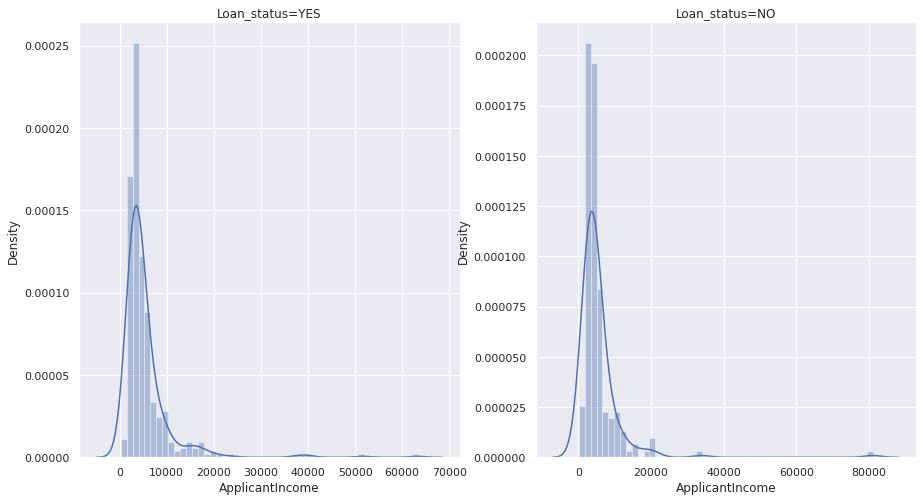

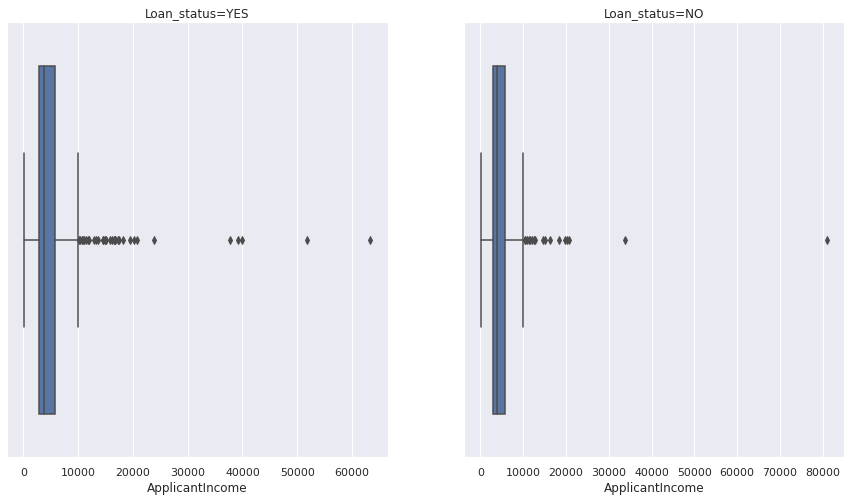

In [ ]:
#display the numeric variables

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.distplot(df[df['Loan_Status'] == 1]['ApplicantIncome'])
plt.title('Loan_status=YES')

plt.subplot(1,2,2)
sns.distplot(df[df['Loan_Status'] == 0]['ApplicantIncome'])
plt.title('Loan_status=NO')

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.boxplot(df[df['Loan_Status'] == 1]['ApplicantIncome'])
plt.title('Loan_status=YES')

plt.subplot(1,2,2)
sns.boxplot(df[df['Loan_Status'] == 0]['ApplicantIncome'])
plt.title('Loan_status=NO')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

Text(0.5, 1.0, 'Loan_status=NO')

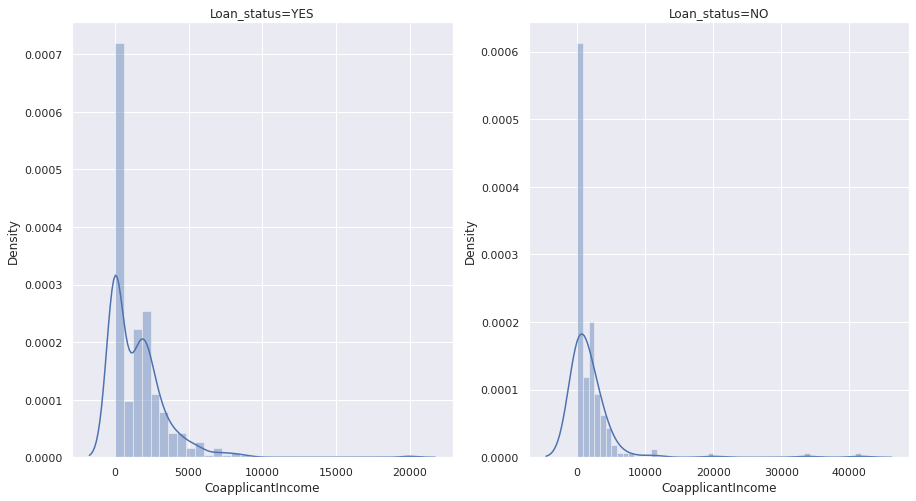

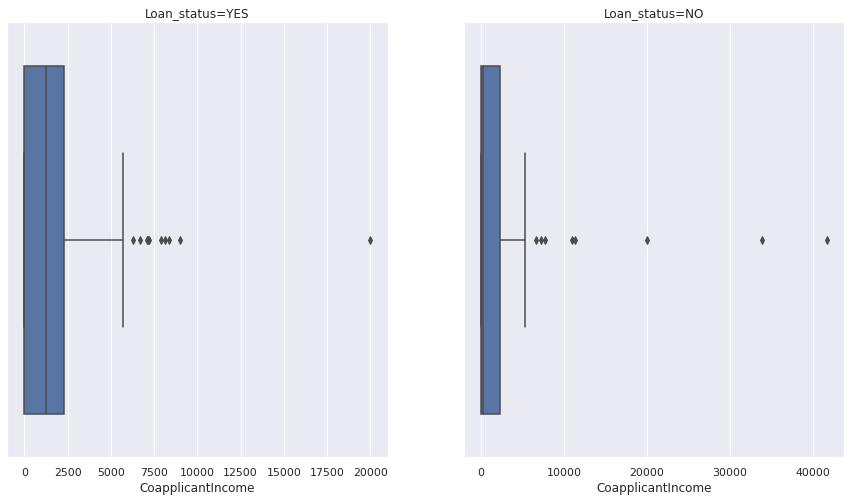

In [ ]:
#display the numeric variables

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.distplot(df[df['Loan_Status'] == 1]['CoapplicantIncome'])
plt.title('Loan_status=YES')

plt.subplot(1,2,2)
sns.distplot(df[df['Loan_Status'] == 0]['CoapplicantIncome'])
plt.title('Loan_status=NO')

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.boxplot(df[df['Loan_Status'] == 1]['CoapplicantIncome'])
plt.title('Loan_status=YES')

plt.subplot(1,2,2)
sns.boxplot(df[df['Loan_Status'] == 0]['CoapplicantIncome'])
plt.title('Loan_status=NO')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

Text(0.5, 1.0, 'Loan_status=NO')

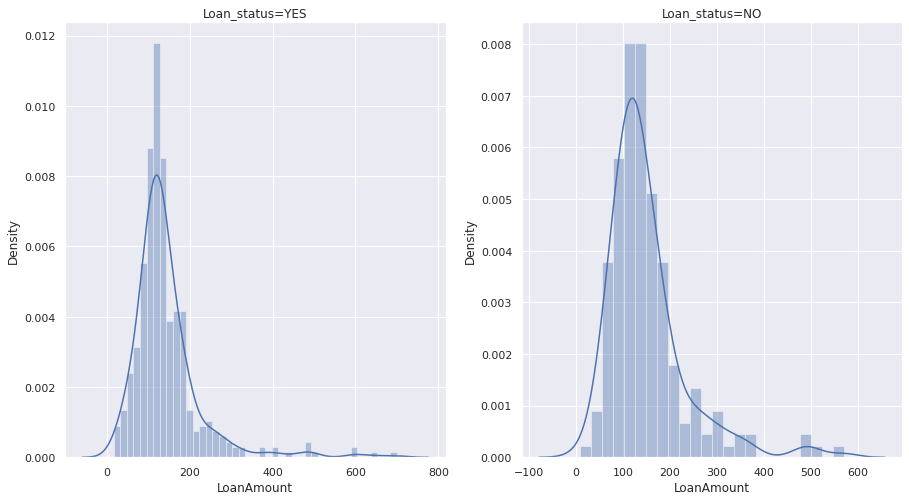

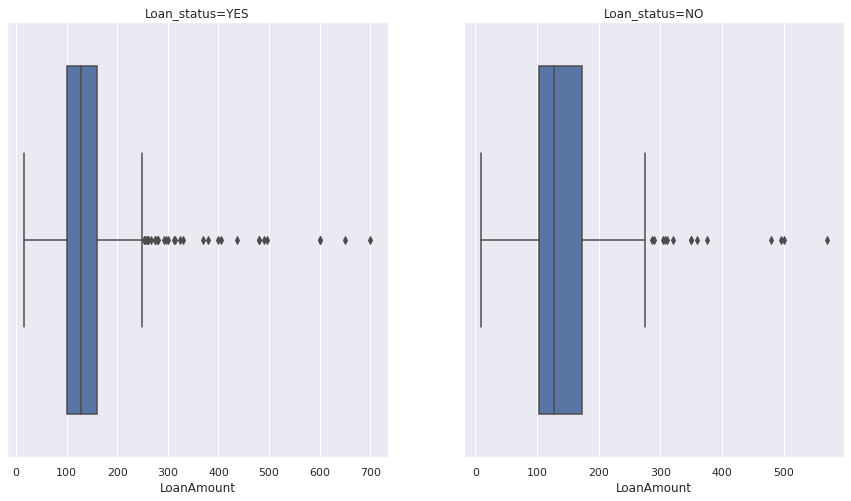

In [ ]:
#display the numeric variables

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.distplot(df[df['Loan_Status'] == 1]['LoanAmount'])
plt.title('Loan_status=YES')

plt.subplot(1,2,2)
sns.distplot(df[df['Loan_Status'] == 0]['LoanAmount'])
plt.title('Loan_status=NO')

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.boxplot(df[df['Loan_Status'] == 1]['LoanAmount'])
plt.title('Loan_status=YES')

plt.subplot(1,2,2)
sns.boxplot(df[df['Loan_Status'] == 0]['LoanAmount'])
plt.title('Loan_status=NO')

### When we talk about correlation, it is easy to get an initial overview with a heatmap: :

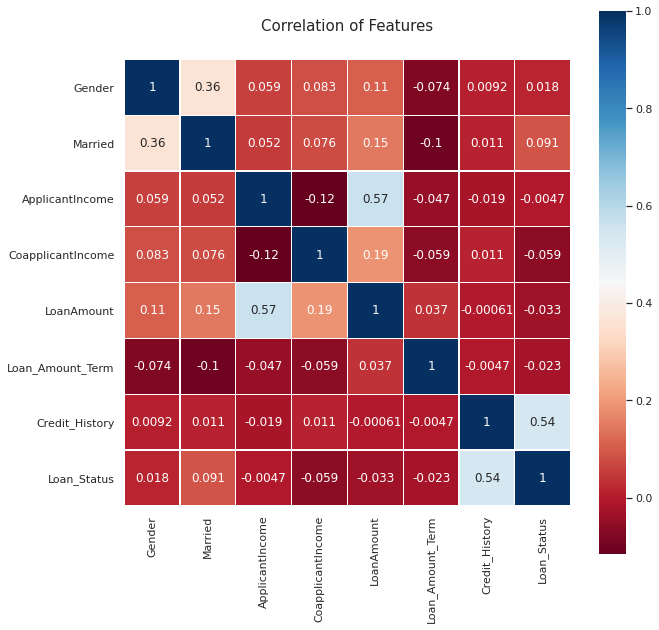

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

### Correlations between numeric variables and the output variable Loan_Status:
- To get an idea of the variables that can be imported for our model 

In [ ]:
#threshold = 0.5
threshold = 0.4


corr_criterion = abs(df.corr()["Loan_Status"])

relevant_features = corr_criterion[corr_criterion>threshold]
relevant_features = relevant_features.reset_index()
relevant_features.columns = ['Variables', 'Correlation']
relevant_features = relevant_features.sort_values(by='Correlation', ascending=False)
relevant_features

,Variables,Correlation
1,Loan_Status,1.000000
0,Credit_History,0.540556


We see that **Credit_History** is the variable most correlated with the target **approved loan or not**.

 - Correlation between numerical variables:
    - With the following function, we can select highly correlated features.
    - It will delete the first feature that is correlated with any other feature.
    - If two numerical variables have a correlation higher than **0.95%** we will delete one of these two variables.

In [ ]:
## Avec l'extrait suivant, nous sélectionnons simplement des variables numériques :
num_col = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = list(df.select_dtypes(include=num_col).columns)
df_data_num = df[numerical_columns]

In [ ]:
# threshold = 0.95
threshold = 0.4

def high_cor_function(df):
    correlation_matrix = df.corr()
    corrm = np.corrcoef(df.transpose())
    correlation = corrm - np.diagflat(corrm.diagonal())
    print("max corr:",correlation.max(), ", min corr: ", correlation.min())
    corr = correlation_matrix.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = corr[corr.values!=1]    
    thresh = threshold 
    display(high_cor[high_cor>thresh])

In [ ]:
df1 = df_data_num.drop('Loan_Status',axis=1)
high_cor_function(df1)

max corr: 0.5651805176233123 , min corr:  -0.11660458122889966


LoanAmount  ApplicantIncome    0.565181
dtype: float64

We deduce that in the data set, only the variables **ApplicantIncome** and **LoanAmount** are correlated by more than 0.4.






### Correlation between categorical variables and target Loan_Status :

In [ ]:
obj_cols = ['Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status']


#use chisquared test to test the dependency between the loan_status and other categorical variables
chisquare_df = pd.DataFrame([], columns=obj_cols, index = obj_cols)

for i in obj_cols:
    for j in obj_cols:
        cont = pd.crosstab(df[i], df[j])
        chisquare_df.loc[i,j] = chi2_contingency(cont)[1]        

chisquare_df

,Dependents,Education,Self_Employed,Property_Area,Loan_Status
Dependents,0,0.498445,0.113058,0.365385,0.368866
Education,0.498445,2.82186e-134,0.909498,0.158031,0.0430996
Self_Employed,0.113058,0.909498,1.12661e-133,0.733485,0.971075
Property_Area,0.365385,0.158031,0.733485,1.35539e-264,0.00213602
Loan_Status,0.368866,0.0430996,0.971075,0.00213602,1.54468e-134


On remarque :
 - **Loan_Status** has a low correlation with **Self_Employed** et **Dependants**.
 - **Loan_Status** has a moderate une correlation with **Education**.
 -  The correlation between **Loan_Status** et **Property_Area** is the best.

### Correlatino between numerical and categorical variables with the **Anova** method.

In [ ]:
#use one way anova to find the realtion between the object type and the float or int type
num_cols1 = df.select_dtypes('float64').columns
num_cols2 = df.select_dtypes('int64').columns

num_cols = num_cols1.append(num_cols2)

In [ ]:
#use one way anova to test the relation between the numeric and categorical variable
anova_df = pd.DataFrame([], columns=obj_cols, index = num_cols)

for i in num_cols:
    for j in obj_cols:
        model = ols(i+' ~ C('+j+')', df).fit()
        anova_df.loc[i,j] = sm.stats.anova_lm(model,typ=1).iloc[0]['PR(>F)']

In [ ]:
anova_df

,Dependents,Education,Self_Employed,Property_Area,Loan_Status
CoapplicantIncome,0.6857,0.123114,0.690514,0.777844,0.142948
LoanAmount,0.000100072,2.62995e-05,0.00429368,0.505361,0.411324
Loan_Amount_Term,0.0116639,0.0671554,0.403963,0.063772,0.577067
Credit_History,0.524429,0.0681631,0.969416,0.670995,7.01968e-48
Gender,0.000196311,0.261709,0.989642,0.0202226,0.65645
Married,3.51008e-18,0.760914,0.911616,0.983573,0.0233984
ApplicantIncome,0.000526011,0.000468364,0.00158968,0.911384,0.907288
Loan_Status,0.370319,0.0333607,0.92709,0.00206862,0


We can see that :
 - **Loan_Status** has a low correlation with **ApplicantIncome** et **Loan_Amount_Term**.
 - **Loan_Status** has a moderate correlation with **Married**,**Gender**,**CoapplicantIncome** et **LoanAmount**.
 - **Loan_Staus** has a better correlation with **Credit_History**(which confirms my results above)

#### See the relationship between loan and loan_amount_term

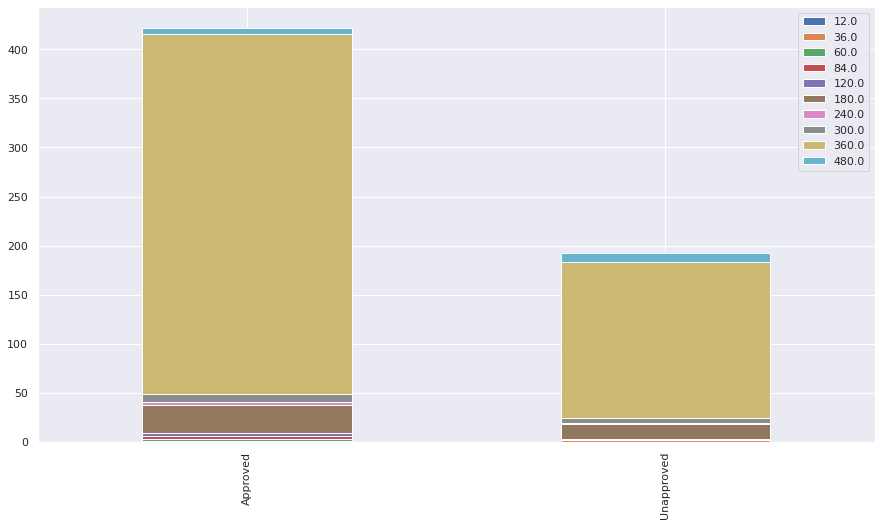

In [ ]:
approved_term = df[df['Loan_Status']==1]['Loan_Amount_Term'].value_counts()
unapproved_term = df[df['Loan_Status']==0]['Loan_Amount_Term'].value_counts()
df_concat = pd.DataFrame([approved_term,unapproved_term])
df_concat.index = ['Approved','Unapproved']
df_concat.plot(kind='bar', stacked=True, figsize=(15,8))

- Taking into account the above analysis results, we will train our model only on the variables that most influence loan approval.

In [ ]:
property_dummies = pd.get_dummies(df['Property_Area'], prefix='Property')
df = pd.concat([df, property_dummies], axis=1)
df.drop('Property_Area', axis=1, inplace=True)

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Property_Rural',
       'Property_Semiurban', 'Property_Urban'],
      dtype='object')

In [ ]:
X = df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History','Property_Rural','Property_Semiurban','Property_Urban']]
y = df.Loan_Status
X.shape, y.shape

((614, 8), (614,))

## **Model Building** 

#### It is important to mention here that, in order to avoid overfitting, feature selection should only be applied to the training set.

In [ ]:
df['Loan_Status'].value_counts(normalize = True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X,y,stratify=y, test_size = 0.2, random_state = 10)

In [ ]:
y_train.value_counts(normalize=True)

1    0.686354
0    0.313646
Name: Loan_Status, dtype: float64

In [ ]:
y_val.value_counts(normalize=True)

1    0.691057
0    0.308943
Name: Loan_Status, dtype: float64

> **Build models**:

In [ ]:
model_rf = RandomForestClassifier(max_depth=4,random_state = 10) 
model_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
model_xgboost = LGBMClassifier(max_depth=4,random_state=10)
model_xgboost.fit(x_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=4,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=10, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

> **Training Models scores**:

In [ ]:
#### Train score
pred_train_random = model_rf.predict(x_train)
round(accuracy_score(y_train,pred_train_random),4)

0.8126

In [ ]:
#### Train score
pred_train_xgboost = model_xgboost.predict(x_train)
round(accuracy_score(y_train,pred_train_xgboost),4)

0.8493

> **Evaluate the models**:

In [ ]:
### Validation  score
def evaluate(model, test_features,test_labels):
  pred_cv = model.predict(test_features)
  print('Model Performance')
  print('Accuracy = {:0.4f}%.'.format(accuracy_score(test_labels,pred_cv)))
  return round(accuracy_score(test_labels,pred_cv),4)

In [ ]:
evaluate(model_rf,x_val,y_val)

Model Performance
Accuracy = 0.8130%.


0.813

In [ ]:
evaluate(model_xgboost,x_val,y_val)

Model Performance
Accuracy = 0.8049%.


0.8049

> **Compare models with cross-validation**:

In [ ]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return round(np.mean(xval),4)

In [ ]:
compute_score(model_rf,X,y)

0.8095

In [ ]:
compute_score(model_xgboost,X,y)

0.7818

> **Check for Overfitting : Print the score on train and test set**


In [ ]:
print('Training set score for Random:{:.4f}'.format(model_rf.score(x_train,y_train)))

print('Validation set score:{:.4f}'.format(model_rf.score(x_val,y_val)))

Training set score for Random:0.8126
Validation set score:0.8130


The training and validation set accuracy are quite comparable. So we cannot say there is overfittting.

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model_rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}


### Hyperparameter Tuning :

In [ ]:
param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60,70],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [4,5,6,7,8],
               'min_samples_split': [2, 5, 10],
               'criterion' :['gini', 'entropy'],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True,False]}

In [ ]:
# Use gridsearch for best hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state=10)

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter =100, cv = 5, verbose=2, random_state=10, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 497 out of 500 | elapsed:   27.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   27.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_,rf_random.best_score_

({'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': 6,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 20},
 0.8105957534528964)

In [ ]:
# Choose the best model random
best_rf_model = RandomForestClassifier(max_depth=6, n_estimators=20,bootstrap= "True",criterion= "entropy", max_features="sqrt",min_samples_leaf= 1,
                                       min_samples_split= 5,random_state=10)
best_rf_model.fit(x_train,y_train)

# Improvement 
best_rf_model_accuracy = evaluate(best_rf_model, x_val, y_val)

base_rf_model_accuracy = evaluate(model_rf,x_val,y_val)

print('Improvement of {:0.2f}%.'.format( 100 * (best_rf_model_accuracy - base_rf_model_accuracy) / base_rf_model_accuracy))

Model Performance
Accuracy = 0.8211%.
Model Performance
Accuracy = 0.8130%.
Improvement of 1.00%.


In [ ]:
property_dummies = pd.get_dummies(df_test['Property_Area'], prefix='Property')
df_test = pd.concat([df_test, property_dummies], axis=1)
df_test.drop('Property_Area', axis=1, inplace=True)

In [ ]:
X_test = df_test[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History','Property_Rural','Property_Semiurban','Property_Urban']]

In [ ]:
predictions_test = best_rf_model.predict(X_test)

In [ ]:
df = pd.DataFrame(df_test['Loan_ID'], columns = ['Loan_ID']) 
df['Loan_Status'] = predictions_test

df.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [ ]:
df['Loan_Status'][df['Loan_Status']==1] = 'Y'
df['Loan_Status'][df['Loan_Status']==0] = 'N'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.to_csv('output.csv',index=False)